# Hint 2 - applying a rectangular mask

**Example: Applying a mask containing a rectangle to an image**

I have downloaded an online image of a house for this example (from [Vector Stock](https://www.vectorstock.com/royalty-free-vector/view-of-the-house-from-the-inside-vector-19801844)). This image contains four different rooms and I want to use a rectangular mask so that only the office room is displayed. As described previously, we can open this image using a the `Image` sub-module of a module called `pillow` (imported as `PIL`) which understands how to read image files. We can then convert this input into a `numpy` `array` object.

In [1]:
from PIL import Image
import numpy as np

im_filename = "images/image-house-vector-stock.jpg"
im = np.array(Image.open(im_filename))

`im` is a three dimensional `numpy` `array` object - includes height, width and colour channel (R, G, B).

In [2]:
shape = im.shape
print(shape)

(780, 1000, 3)


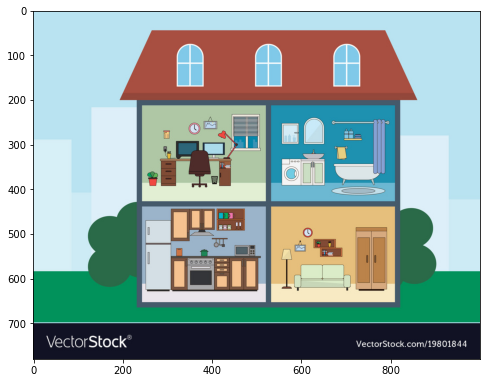

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(im)

The `imshow` function knows how to interpret this 3D shape to show a colour image.

## Create a rectanglar mask using a function

I can define an function called `inside_rectangle()` to tell me whether a given (x, y) position is within a rectangle for a set of parameters. This will return `True` if the position is inside the rectangle and `False` otherwise.

The rectangle can be evaluated using the conditions:

$$|x - x_0| = w/2$$
and
$$|y - y_0| = h/2$$

where
 - $x$, $y$ are the x, y positions within the grid
 - $x_0$, $y_0$ are the centre of the rectangle
 - $w$, $h$ - are the full width and height of the rectangle
 - $| |$ means the magnitude of the difference

In [4]:
def inside_rectangle(x,y,centre=(0,0),width=20,height=10):
    
    x0 = centre[0]
    y0 = centre[1]
    
    distance_x = np.abs(x - x0) # Magnitude of distance
    distance_y = np.abs(y - y0) # Magnitude of distance
    
    # Check if (x, y) position is within the rectangle
    if distance_x < width/2 and distance_y < height/2:
        return True
    else:
        return False

For this mask, I want to define the parameters as follows:

In [5]:
# Input parameters
centre = (382,320)
width = 280
height = 218

The `inside_rectangle` function allows you to pass the parameters for your position and your rectangle and can tell you whether the position is within your rectangle (returns a `True` value) or not (returns a `False` value). For example if we had a position of (50, 50) we could use the function as follows:

In [6]:
x = 50
y = 50

position_is_in_rectangle = inside_rectangle(x, y, centre=centre, width=width, height=height)

if position_is_in_rectangle:
    print(f"Position ({x}, {y}) is within the rectangle")
else:
    print(f"Not within rectangle")

Not within rectangle


Here we used the output of `inside_rectangle` as our condition directly (Python sees this `if True` or `if False` and follows the logic accordingly).

We can use the `inside_rectangle()` function to define our mask - looping over every element and checking the x, y position with the `inside_rectangle()` function with the appropriate parameters:

In [7]:
ncol = shape[0]
nrow = shape[1]

# Create array of zeros based on shape of input image - height x width
rect_mask = np.zeros(shape[0:2],dtype=int)

for y in range(ncol): # iterate over first dimension
    for x in range(nrow): # iterate over second dimension
        # Check whether x, y position is within defined rectangle
        position_is_in_rectangle = inside_rectangle(x, y, centre=centre, width=width, height=height)
        if position_is_in_rectangle:
            rect_mask[y, x] = 1

print(f"Shape of mask: {rect_mask.shape}")

Shape of mask: (780, 1000)


As before, we don't need an `else` block here because the array we have defined already contains zeros.

**Extended:** See [alternative numpy method](hint1_mask.ipynb#Extended:-Leveraging-numpy-functionality) mask in Hint 1 notebook for a more efficient way to create a square mask. Could you extend this method to reproduce a rectangular mask (without the need for the `inside_rectangle` function)?

## Apply mask to the image

Now we have created `rect_mask`, we need to apply this to my image. We can do this by multiplying `im` by `rect_mask` and this will combine element-wise. This means that each pixel in the image will be multiplied by the corresponding value within the mask. Multipying by 0 will result in the output pixel also being 0 but multiplying by 1 will retain the original value in that pixel.

For creating the `im_masked` output there a few ways you could do this - the upshot is that you want to create an array of the right *shape*:
 - Create an empty array of the right shape
 - Create a new variable called `im_masked` which is a copy of the `im` using the [`copy()` function (method)](https://numpy.org/doc/stable/reference/generated/numpy.copy.html)

Because `im` is a three dimensional array (height x weight x colour channel), one way to apply the mask is to do this for each of the three colours (R, G, B channels) separately.

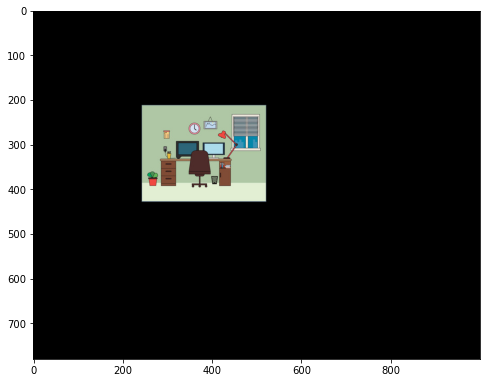

In [8]:
## Create an empty array of the right shape
im_masked = np.empty(shape)
## OR make a copy and then apply mask
#im_masked = im.copy()

# Update the values within this array for each colour channel
im_masked[:,:,0] = im[:,:,0]*rect_mask # shapes match (780, 1000) x (780, 1000)
im_masked[:,:,1] = im[:,:,1]*rect_mask # shapes match (780, 1000) x (780, 1000)
im_masked[:,:,2] = im[:,:,2]*rect_mask # shapes match (780, 1000) x (780, 1000)

# # Another way to write this would be to add an extra dimension to our mask
# # - This can be done using the np.newaxis constant to add an extra dimension
# # - Numpy can then *broadcast* along this new dimension to combine correctly
# im_masked = im*rect_mask[:,:,np.newaxis] # shapes (780, 1000, 3) x (780, 1000, 1)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(im_masked.astype(int)) 